# Project: Investigation of the FBI NICS dataset

# by Julien Roquelaure

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The main dataset comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives.

In addition, we download a U.S. census dataset for comparison against the NICS data.

The datasets can be found here:

[NICS](https://github.com/BuzzFeedNews/nics-firearm-background-checks)

[Census](https://www.census.gov/)

Let us import the necessary libraries first:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In this project, we want to answer the followong questions:

1. What are the country-wide trends about gun purchases?
2. How do states differ from one another in this respect?
3. By using the details of each state's demographics, can we find associations with gun purchases?

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section, I will load 2 datasets:
- the NICS data, which contains the number of firearm checks by month, state, and type.
- the U.S. census data, which contains demographics data about each state

In [2]:
nics = pd.read_excel('gun_data.xlsx')
census = pd.read_csv('U.S. Census Data.csv')

In [3]:
nics.shape

(12485, 27)

In [4]:
nics.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [5]:
nics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [6]:
census.shape

(85, 52)

In [7]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [8]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

### Data cleaning for the Census dataset

Already we notice two things about the census dataset:

- the data is arranged with states in columns, and variables in rows, so we will transpose the table.
- there are several lines (and one column) of notes, that might be useful for reference but not for computation and visualization, so we get rid of them.

In [9]:
census.drop(['Fact Note'], axis=1, inplace=True)

In [10]:
census.rename(columns={'Fact': 'State'}, inplace=True)

In [11]:
census = census.T

We use the first row as our column name and drop it afterwards:

In [12]:
census.columns = census.iloc[0]
census.drop('State', inplace=True)

We drop all the columns with the different notes and comments:

In [13]:
census.dropna(axis=1, inplace=True)

In [14]:
census.head()

State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


Now, we have the demographics for the 50 states. But we have 65 features, which is a lot. 
Let's take a look at which ones we could use:

In [15]:
census.columns

Index(['Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V20

The U.S. census occurs every 10 years. So we have 2010 measured populations and 2016 estimates.

For this project I will trust the estimates and keep only the 2016 values when possible.

For my analysis I will select the following variables (with their new names):

Population and density:
- Population estimates, July 1, 2016,  (V2016) as 'population'
- Land area in square miles, 2010, as 'land_area'

Age:
- Persons under 18 years, percent, July 1, 2016,  (V2016) as 'under_18y_percent'
- Persons 65 years and over, percent,  July 1, 2016,  (V2016) as 'over_65y_percent'

Gender:
- Female persons, percent,  July 1, 2016,  (V2016) as 'female_percent'

Race:
- Black or African American alone, percent, July 1, 2016,  (V2016) as 'black_percent'
- American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016) as 'native_american_percent'
- Asian alone, percent, July 1, 2016,  (V2016) as 'asian_percent'
- Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016) as 'native_pacific_percent'
- Hispanic or Latino, percent, July 1, 2016,  (V2016) as 'hispanic_percent'
- White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016) as 'white_percent'

Military status:
- Veterans, 2011-2015 as 'veterans'

Foreign birth status:
- Foreign born persons, percent, 2011-2015 as 'foreign_born_percent'

Education:
- High school graduate or higher, percent of persons age 25 years+, 2011-2015 as 'hs_percent'
- Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015 as 'bachelor_percent'

Employment and income:
- Total employment, 2015 as 'employment'
- Per capita income in past 12 months (in 2015 dollars), 2011-2015 as 'per_capita_income'


I discarded several variables that seemed less relevant for individuals like sales, number of firms or land area.

In each category of features, I tried to keep only a handful of variables in order to not clutter the project. 


In [16]:
census = census[['Population estimates base, April 1, 2010,  (V2016)', 
        'Land area in square miles, 2010', 
        'Persons under 18 years, percent, July 1, 2016,  (V2016)',
        'Persons 65 years and over, percent,  July 1, 2016,  (V2016)', 
        'Female persons, percent,  July 1, 2016,  (V2016)', 
        'Black or African American alone, percent, July 1, 2016,  (V2016)', 
        'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
        'Asian alone, percent, July 1, 2016,  (V2016)',
        'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
        'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
        'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)',
        'Veterans, 2011-2015',
        'Foreign born persons, percent, 2011-2015',
        'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
        "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015",
        'Total employment, 2015',
        'Per capita income in past 12 months (in 2015 dollars), 2011-2015'
       ]]

In [17]:
census = census.rename(columns = {
    'Population estimates base, April 1, 2010,  (V2016)': 'population',
    'Land area in square miles, 2010': 'land_area',
    'Persons under 18 years, percent, July 1, 2016,  (V2016)': 'under_18y_percent',
        'Persons 65 years and over, percent,  July 1, 2016,  (V2016)': 'over_65y_percent', 
        'Female persons, percent,  July 1, 2016,  (V2016)': 'female_percent', 
        'Black or African American alone, percent, July 1, 2016,  (V2016)': 'black_percent', 
        'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)': 'native_american_percent',
        'Asian alone, percent, July 1, 2016,  (V2016)': 'asian_percent',
        'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)': 'native_pacific_percent',
        'Hispanic or Latino, percent, July 1, 2016,  (V2016)': 'hispanic_percent',
        'White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)': 'white_percent',
        'Veterans, 2011-2015': 'veterans',
        'Foreign born persons, percent, 2011-2015': 'foreign_born_percent',
        'High school graduate or higher, percent of persons age 25 years+, 2011-2015': 'hs_percent',
        "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015": 'bachelor_percent',
        'Total employment, 2015': 'employment',
        'Per capita income in past 12 months (in 2015 dollars), 2011-2015': 'per_capita_income'
})

In [18]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   population               50 non-null     object
 1   land_area                50 non-null     object
 2   under_18y_percent        50 non-null     object
 3   over_65y_percent         50 non-null     object
 4   female_percent           50 non-null     object
 5   black_percent            50 non-null     object
 6   native_american_percent  50 non-null     object
 7   asian_percent            50 non-null     object
 8   native_pacific_percent   50 non-null     object
 9   hispanic_percent         50 non-null     object
 10  white_percent            50 non-null     object
 11  veterans                 50 non-null     object
 12  foreign_born_percent     50 non-null     object
 13  hs_percent               50 non-null     object
 14  bachelor_percent         50 non-null  

Now, we see that all the values are of string data type. So we need to transform all of them to numbers.

First we need to strip the strings of their special characters, or non-numerical values:

(Note that in some fields a Z value is a placeholder for a very small nonzero value, that we choose to put to 0)

In [19]:
for c in ['population', 'land_area', 'veterans', 'employment', 'per_capita_income']:
    census[c] = census[c].apply(lambda x: x.replace(',',''))

for c in census.columns.values[census.columns.str.contains('percent')]:
    census[c] = census[c].apply(lambda x: x.replace('Z', '0'))
    census[c] = census[c].apply(lambda x: x.replace('%',''))

census['per_capita_income'] = census['per_capita_income'].apply(lambda x: x.replace('$',''))
    
    

In [20]:
for c in census.columns.values[census.columns.str.contains('percent')]:
    census[c] = census[c].apply(lambda x: float(x))

In [21]:
for c in ['land_area', 'per_capita_income']:
    census[c] = census[c].apply(lambda x: float(x))

for c in ['population', 'veterans', 'employment']:
    census[c] = census[c].apply(lambda x: int(x))

In [22]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   population               50 non-null     int64  
 1   land_area                50 non-null     float64
 2   under_18y_percent        50 non-null     float64
 3   over_65y_percent         50 non-null     float64
 4   female_percent           50 non-null     float64
 5   black_percent            50 non-null     float64
 6   native_american_percent  50 non-null     float64
 7   asian_percent            50 non-null     float64
 8   native_pacific_percent   50 non-null     float64
 9   hispanic_percent         50 non-null     float64
 10  white_percent            50 non-null     float64
 11  veterans                 50 non-null     int64  
 12  foreign_born_percent     50 non-null     float64
 13  hs_percent               50 non-null     float64
 14  bachelor_percent      

In [23]:
census.head()
census.shape

(50, 17)

Now I am satisfied with my census dataset.
The state serves as the index. And we have 17 numerical features. 
They have a more manageable format, and the names ends with "percent" when the value is a percentage.

### Data cleaning for the NICS dataset

Now I want to compare which states and territories are common to the census and NICS dataset.

In [24]:
nics.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [25]:
nics.shape[0] / nics[nics.state.isin(census.index.values)].shape[0]
nics.state.nunique()

55

So, in addition to the 50 states, the NICS contains data on 5 territories.
The census has data for the 50 States, so I will drop the NICS Territories data.

In [26]:
nics = nics[nics.state.isin(census.index.values)]

In [27]:
# nics.shape
# nics.fillna(0).describe()
# nics.info()
nics.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,11348.000000,1000.000000,11350.000000,11350.000000,5000.000000,11350.000000,11348.000000,9597.000000,9595.000000,4650.000000,...,1650.000000,900.000000,750.000000,2500.000000,2500.000000,2500.000000,2250.000000,2500.000000,2050.000000,11350.000000
mean,7041.630331,1282.552000,6509.303877,8575.439648,396.052400,295.059471,64.675097,5.301969,8.604482,0.181720,...,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,23734.978502
std,24801.129677,9667.124288,8829.284061,9416.217660,1410.425364,816.710594,633.514277,11.321981,17.067140,1.107227,...,4.587865,0.665018,0.703878,74.529346,56.771827,4.673652,1.511227,1.596113,0.446012,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,1327.250000,2778.000000,37.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.000000
50%,814.000000,0.000000,3622.500000,5893.000000,148.000000,151.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14050.000000
75%,5137.750000,1.000000,7987.750000,11021.500000,393.000000,328.750000,0.000000,5.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27537.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


The NICS dataset runs from November 1998 to September 2017. 

I will create a subset of the NICS data, based only on the last 5 years for comparison with the census: "nics_5y".

The NICS dataset is too wide to see all columns in a describe method, so I will split the columns in two parts to see all the fearures.

In [28]:
nics_5y = nics[nics['month']>'2012-09']

In [29]:
n_row, n_col = nics.shape
nics.iloc[:, 0:int(n_col/2)].describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun
count,11348.000000,1000.000000,11350.000000,11350.000000,5000.000000,11350.000000,11348.000000,9597.000000,9595.000000,4650.000000,9600.000000
mean,7041.630331,1282.552000,6509.303877,8575.439648,396.052400,295.059471,64.675097,5.301969,8.604482,0.181720,448.087604
std,24801.129677,9667.124288,8829.284061,9416.217660,1410.425364,816.710594,633.514277,11.321981,17.067140,1.107227,810.116491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1327.250000,2778.000000,37.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,814.000000,0.000000,3622.500000,5893.000000,148.000000,151.000000,0.000000,0.000000,2.000000,0.000000,74.000000
75%,5137.750000,1.000000,7987.750000,11021.500000,393.000000,328.750000,0.000000,5.000000,9.000000,0.000000,647.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000


In [30]:
nics.iloc[:, int(n_col/2):].describe()

,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,9598.000000,4650.000000,2000.000000,1950.000000,1650.000000,900.000000,750.000000,2500.000000,2500.000000,2500.000000,2250.000000,2500.000000,2050.000000,11350.000000
mean,658.392582,1.995699,32.573500,8.313333,1.130303,0.084444,0.096000,16.427200,12.763200,1.131600,0.439556,0.484400,0.115610,23734.978502
std,978.295189,4.760378,85.381401,23.040103,4.587865,0.665018,0.703878,74.529346,56.771827,4.673652,1.511227,1.596113,0.446012,33437.577310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6472.000000
50%,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14050.000000
75%,977.000000,2.000000,20.000000,5.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27537.000000
max,8831.000000,79.000000,603.000000,168.000000,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Among the different categories, I will keep only the columns where the mean of at least one subcategory is above 100, which means that there are more than 100 background checks per state per month on average.

Therefore, I will drop the admin, prepawn, returned, rentals, private_sale, return_to_seller. It makes sense because they are either about giving away a weapon, administrative or an uncommon way of acquiring one.

In [31]:
nics.loc[:, 'permit':'totals'].mean() > 100

permit                        True
permit_recheck                True
handgun                       True
long_gun                      True
other                         True
multiple                      True
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun            True
redemption_long_gun           True
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                        True
dtype: bool

In [32]:
nics.isna().sum()

month                            0
state                            0
permit                           2
permit_recheck               10350
handgun                          0
long_gun                         0
other                         6350
multiple                         0
admin                            2
prepawn_handgun               1753
prepawn_long_gun              1755
prepawn_other                 6700
redemption_handgun            1750
redemption_long_gun           1752
redemption_other              6700
returned_handgun              9350
returned_long_gun             9400
returned_other                9700
rentals_handgun              10450
rentals_long_gun             10600
private_sale_handgun          8850
private_sale_long_gun         8850
private_sale_other            8850
return_to_seller_handgun      9100
return_to_seller_long_gun     8850
return_to_seller_other        9300
totals                           0
dtype: int64

Among the remaining columns, for the purpose of the analysis, I decide to drop the permit_recheck because of the missing values, and the redemption category, in order to concentrate on permits and types of guns.

In [33]:
nics[nics['permit'].isna()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
7279,2006-09,Louisiana,NaN,NaN,5948.0,10836.0,NaN,253,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19080
7310,2006-09,Virginia,NaN,NaN,6935.0,11023.0,NaN,242,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18200


In [34]:
nics[nics.other.isna()].head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
5500,2009-05,Alabama,0.0,NaN,8829.0,7878.0,NaN,559,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20277


I will fill the other missing values with 0. There are about 2 missing permit values, and the "other" category which is filled after May 2009 seemingly.

In [35]:
nics = nics[['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals']].fillna(0)
nics_5y = nics_5y[['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple', 'totals']].fillna(0)

In [36]:
nics.isna().sum()

month       0
state       0
permit      0
handgun     0
long_gun    0
other       0
multiple    0
totals      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

After the cleanup, in this section, we want to answer the following questions:

1. What are the country-wide trend of gun purchases during the last 20 years?
2. What are the states that give rise to the most NICS checks?
3. What census data is most associated with high gun per capita? 

A caveat of this analysis is that we will use NICS background, not gun purchases per se. Because of the varying state laws and purchase scenarios, there is not a one-to-one correspondance between background checks and gun purchases.

Nevertheless, in this project, we will consider it a good enough proxy.

### Country-wide trend of gun purchases

In the following, we use a groupby method to sum the data of the 50 states and see the time evolution.

In [37]:
nics_country = nics.groupby('month').sum()
nics_5y_country = nics_5y_country = nics_5y.groupby('month').sum()

In [38]:
nics_country.tail()

,permit,handgun,long_gun,other,multiple,totals
month,,,,,,
2017-05,830898.0,550551.0,327885.0,29297.0,16926,1896910
2017-06,800512.0,567630.0,330890.0,29690.0,17030,1886240
2017-07,754798.0,478844.0,322020.0,26838.0,15682,1731550
2017-08,789893.0,506098.0,396659.0,27583.0,18221,1894569
2017-09,761620.0,477315.0,417126.0,26897.0,17612,1856214


In [39]:
nics_5y_country.tail()

,permit,handgun,long_gun,other,multiple,totals
month,,,,,,
2017-05,830898.0,550551.0,327885.0,29297.0,16926,1896910
2017-06,800512.0,567630.0,330890.0,29690.0,17030,1886240
2017-07,754798.0,478844.0,322020.0,26838.0,15682,1731550
2017-08,789893.0,506098.0,396659.0,27583.0,18221,1894569
2017-09,761620.0,477315.0,417126.0,26897.0,17612,1856214


In [40]:
n_month = nics.shape[0]/50

First, I want to plot the data for each gun category for the last 20 years.

I noticed that my x ticks were cluttered, so I decided to display them vertically and every 6 months, starting January 1999.

The "other" and "multiple" (even if multiply by a small integer, which is a reasonable expectation of "multiple") categories seem to be a small part of the overall background checks, si I dropped them from the figure.

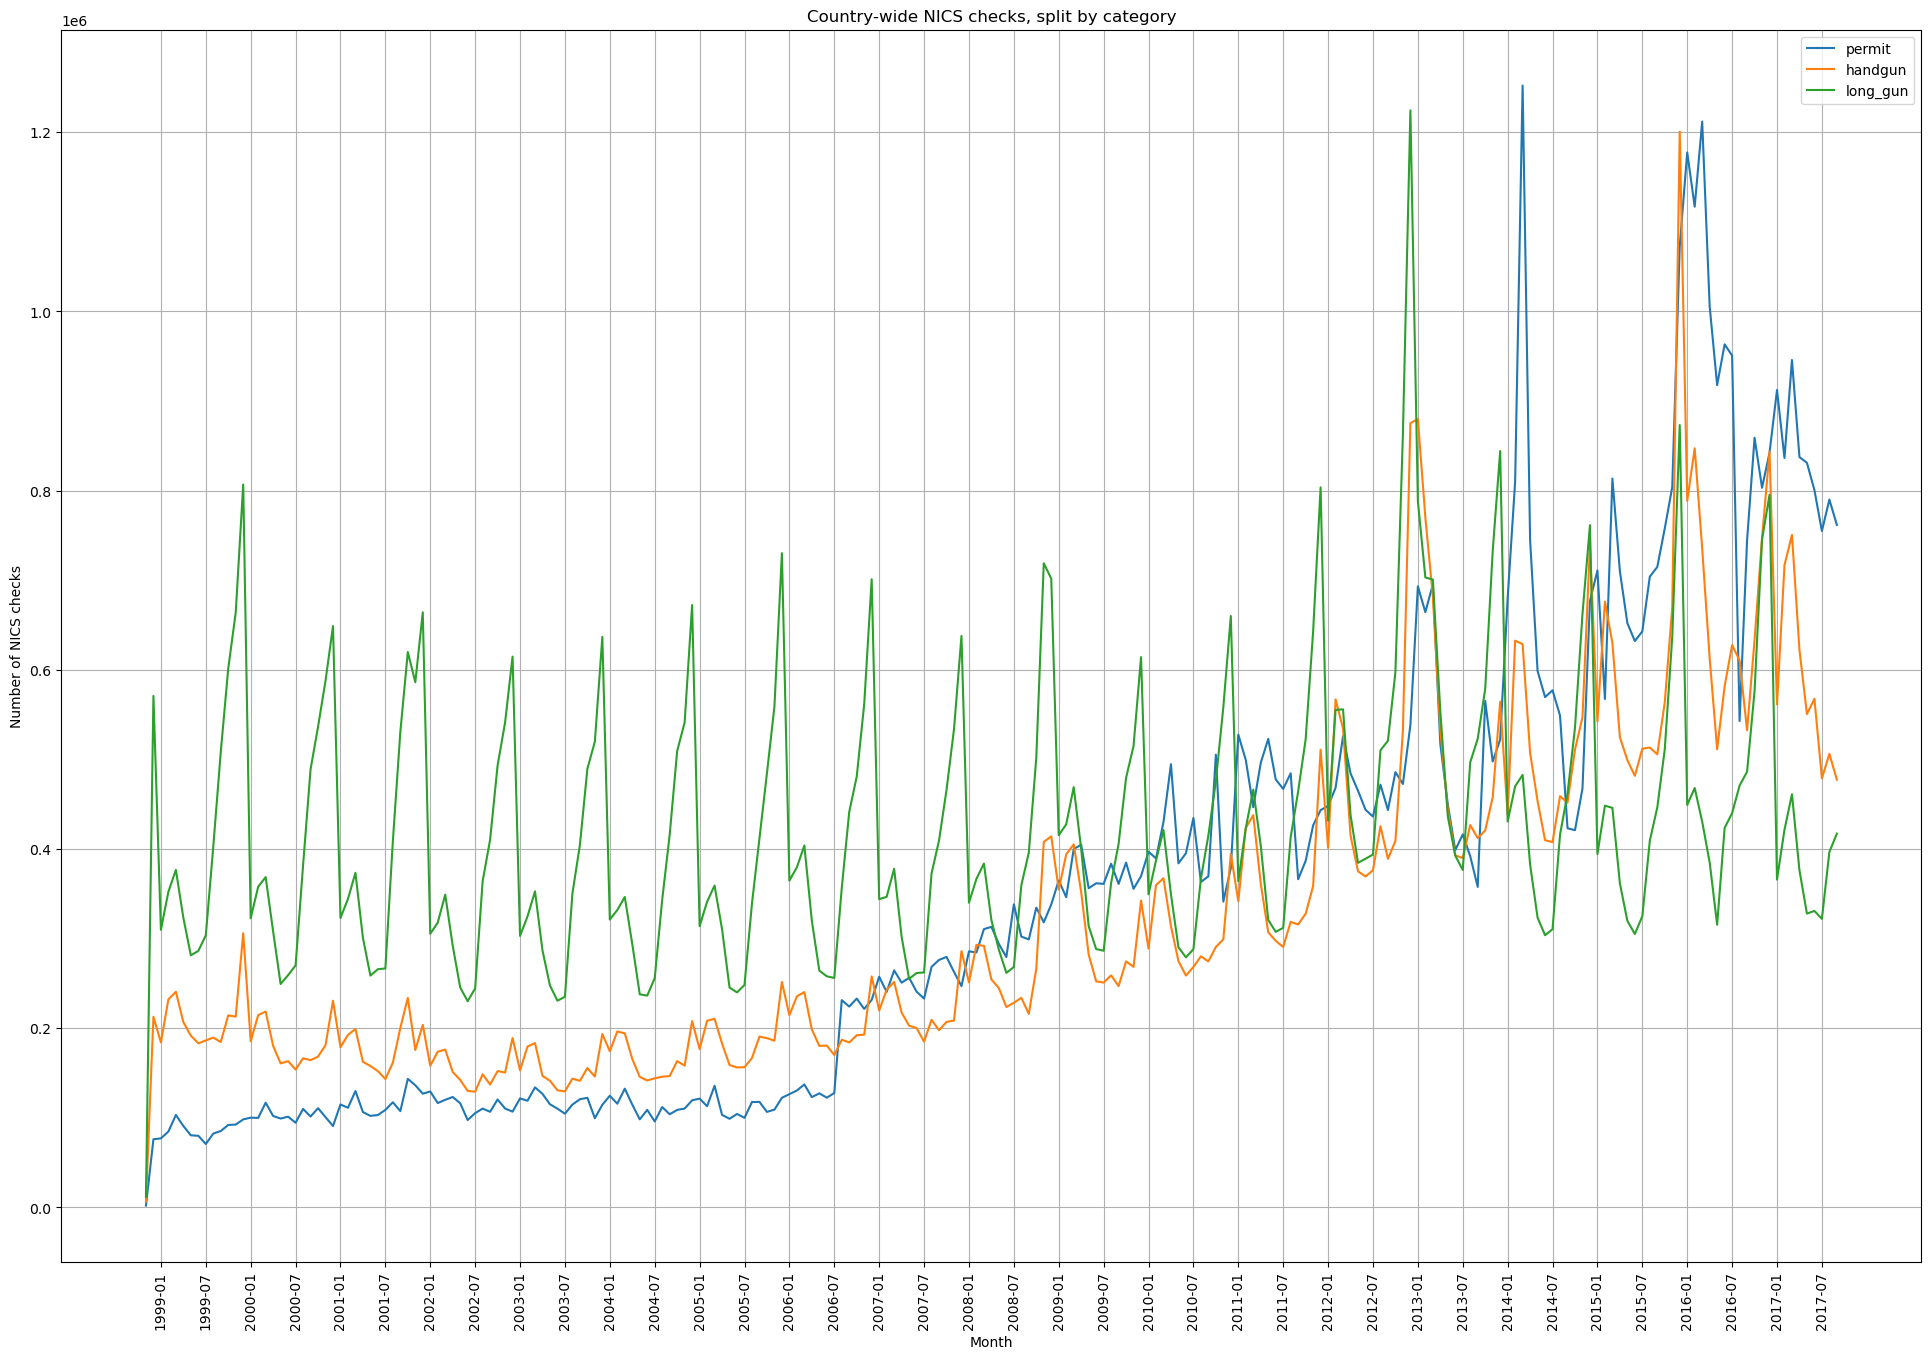

In [41]:
plt.figure(figsize=[24,16])
plt.plot(nics_country.index, nics_country.loc[:, 'permit':'long_gun'])
plt.xlabel('Month')
plt.ylabel('Number of NICS checks')
plt.legend(nics_country.columns)
plt.title('Country-wide NICS checks, split by category')
plt.xticks(np.arange(2, n_month, step=6), rotation='vertical')
plt.grid(True)
plt.show()

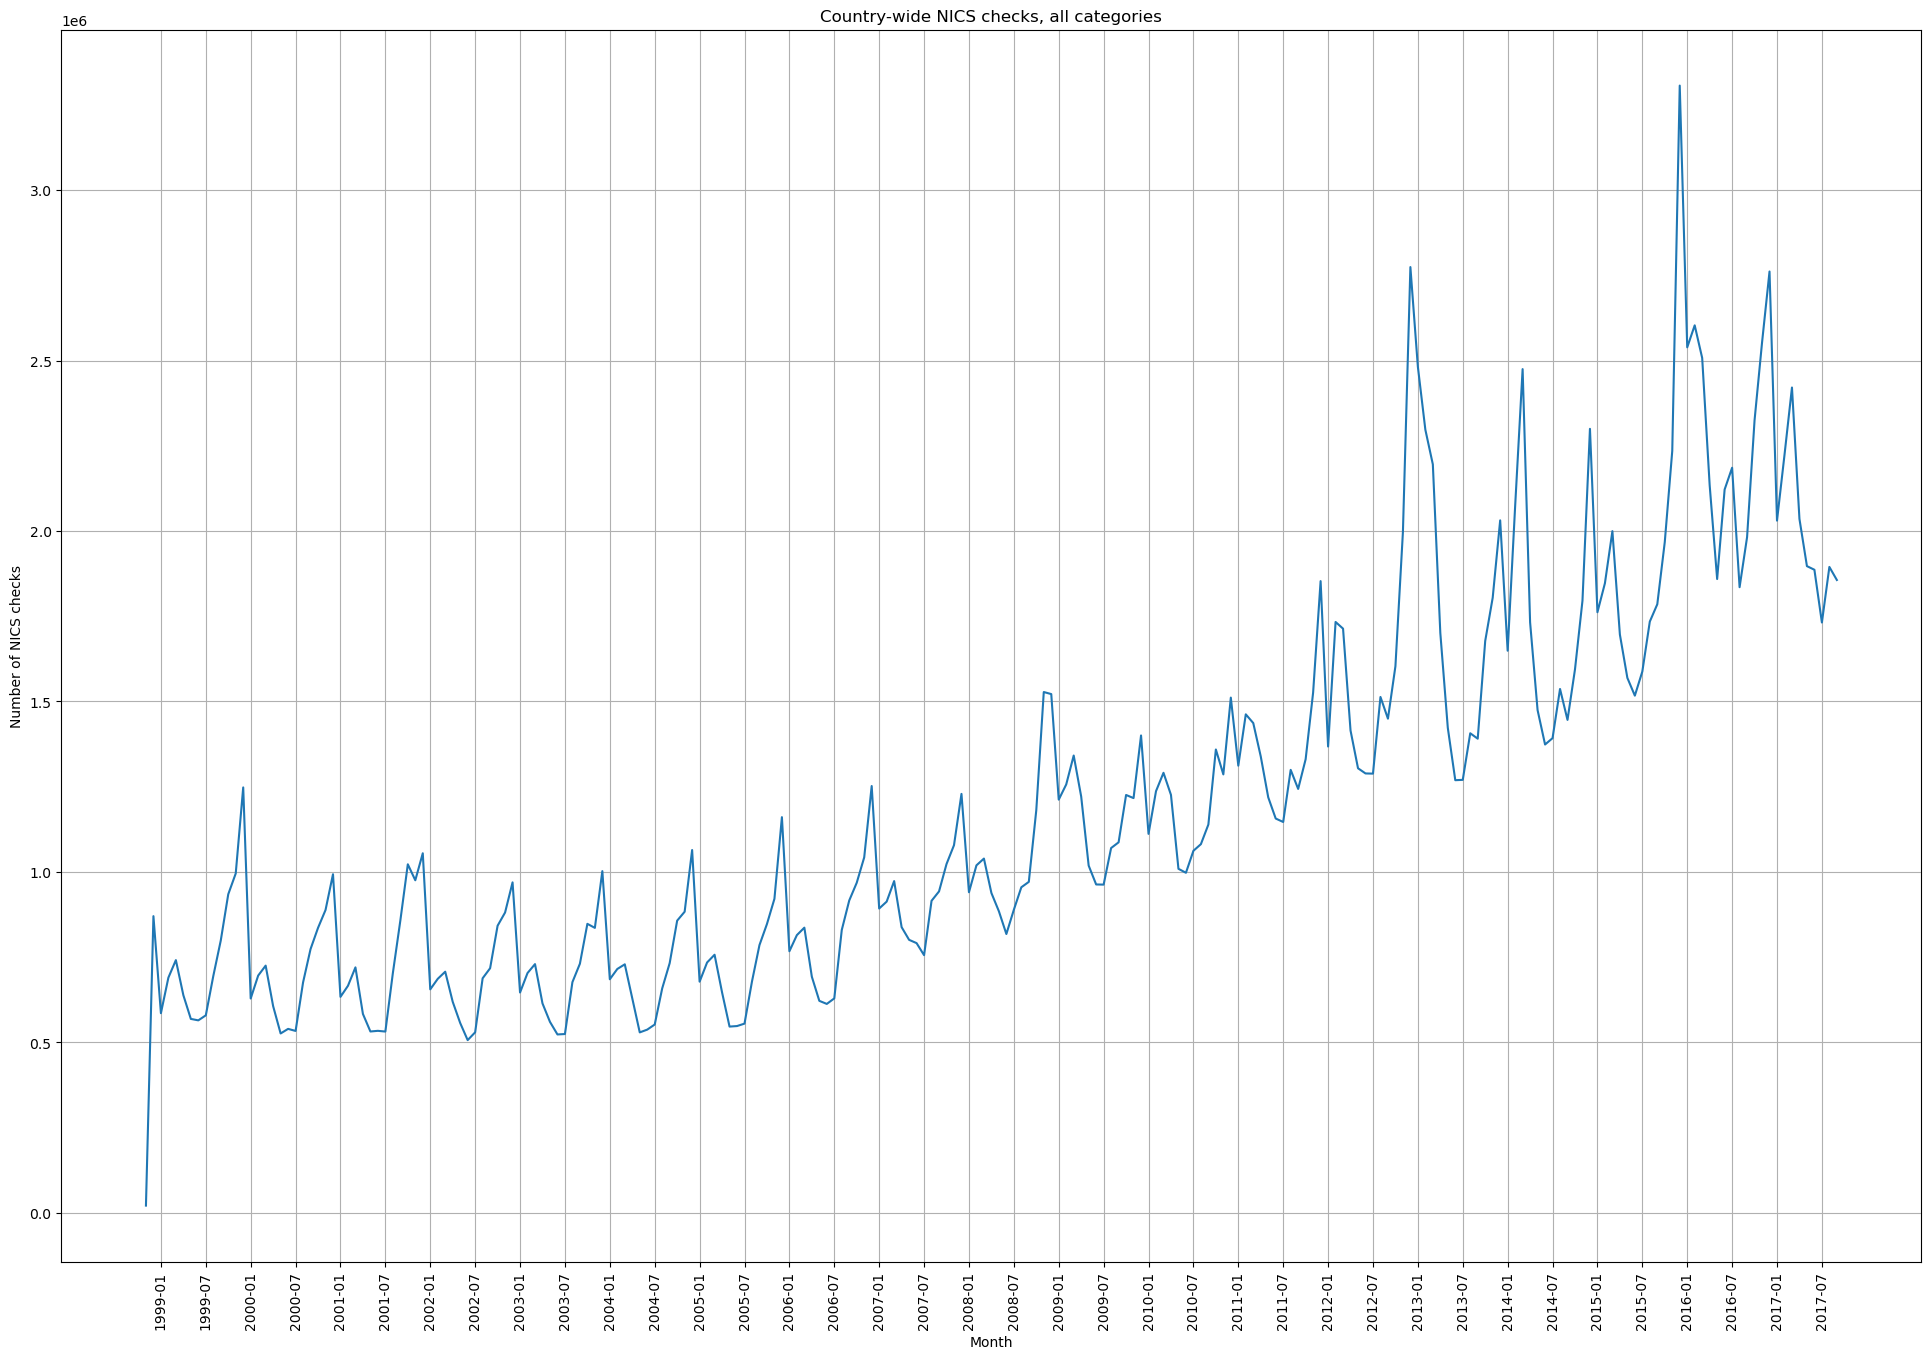

In [42]:
plt.figure(figsize=[24,16])
plt.plot(nics_country.index, nics_country['totals'])
plt.xlabel('Month')
plt.ylabel('Number of NICS checks')
plt.title('Country-wide NICS checks, all categories')
plt.xticks(np.arange(2, n_month, step=6), rotation='vertical')
plt.grid(True)
plt.show()

Zoom-in on the last 5 years:

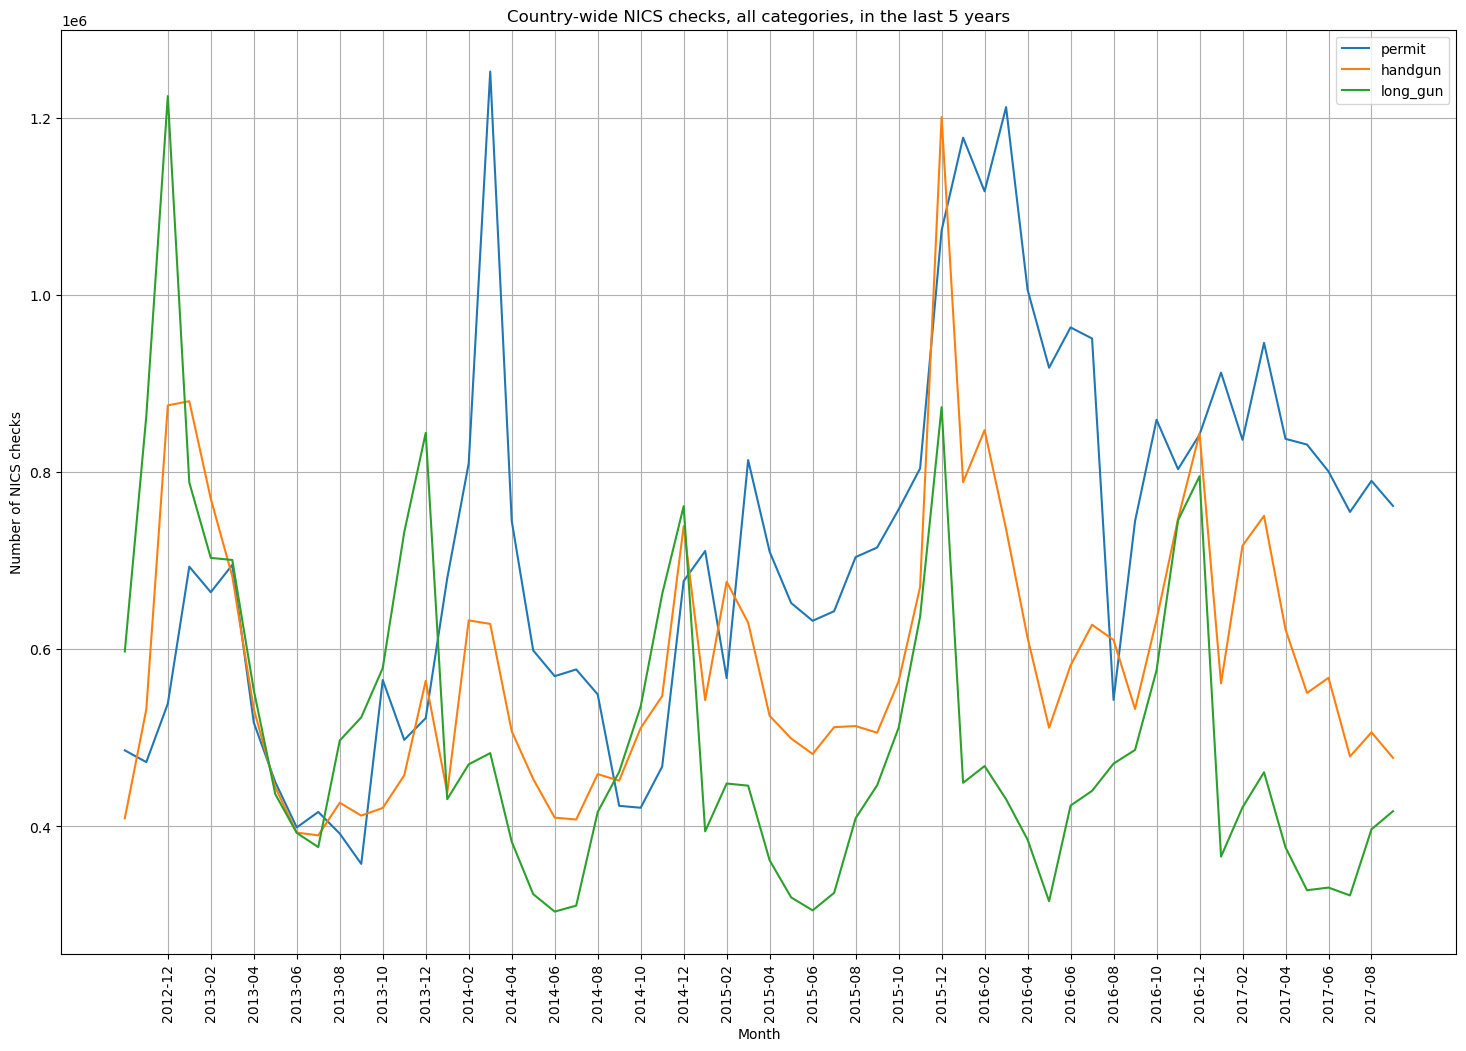

In [43]:
plt.figure(figsize=[18,12])
plt.plot(nics_5y_country.index, nics_5y_country.loc[:, 'permit':'long_gun'])
plt.xlabel('Month')
plt.ylabel('Number of NICS checks')
plt.legend(nics_5y_country.columns)
plt.title('Country-wide NICS checks, all categories, in the last 5 years')
plt.xticks(np.arange(2, 60, step=2), rotation='vertical')
plt.grid(True)
plt.show()

We notice first that the overall gun purchases seems to increase for the last 10 years. This increase is driven by permit and handgun triggered background checks. The long gun purchases seem more stable over time.

There is an interesting periodic pattern, with a peak in December and a trough in the Summer, for gun purchases. 

Permits seem to follow along but more irregularly, with for example a sudden increase in 2006, maybe triggered by new laws.

### State-level gun purchases

Now, let us look at the state level. We use a groupby method on our 20-year and 5-year datasets.

In [44]:
nics_states = nics.groupby('state').sum()
nics_5y_states = nics_5y.groupby('state').sum()

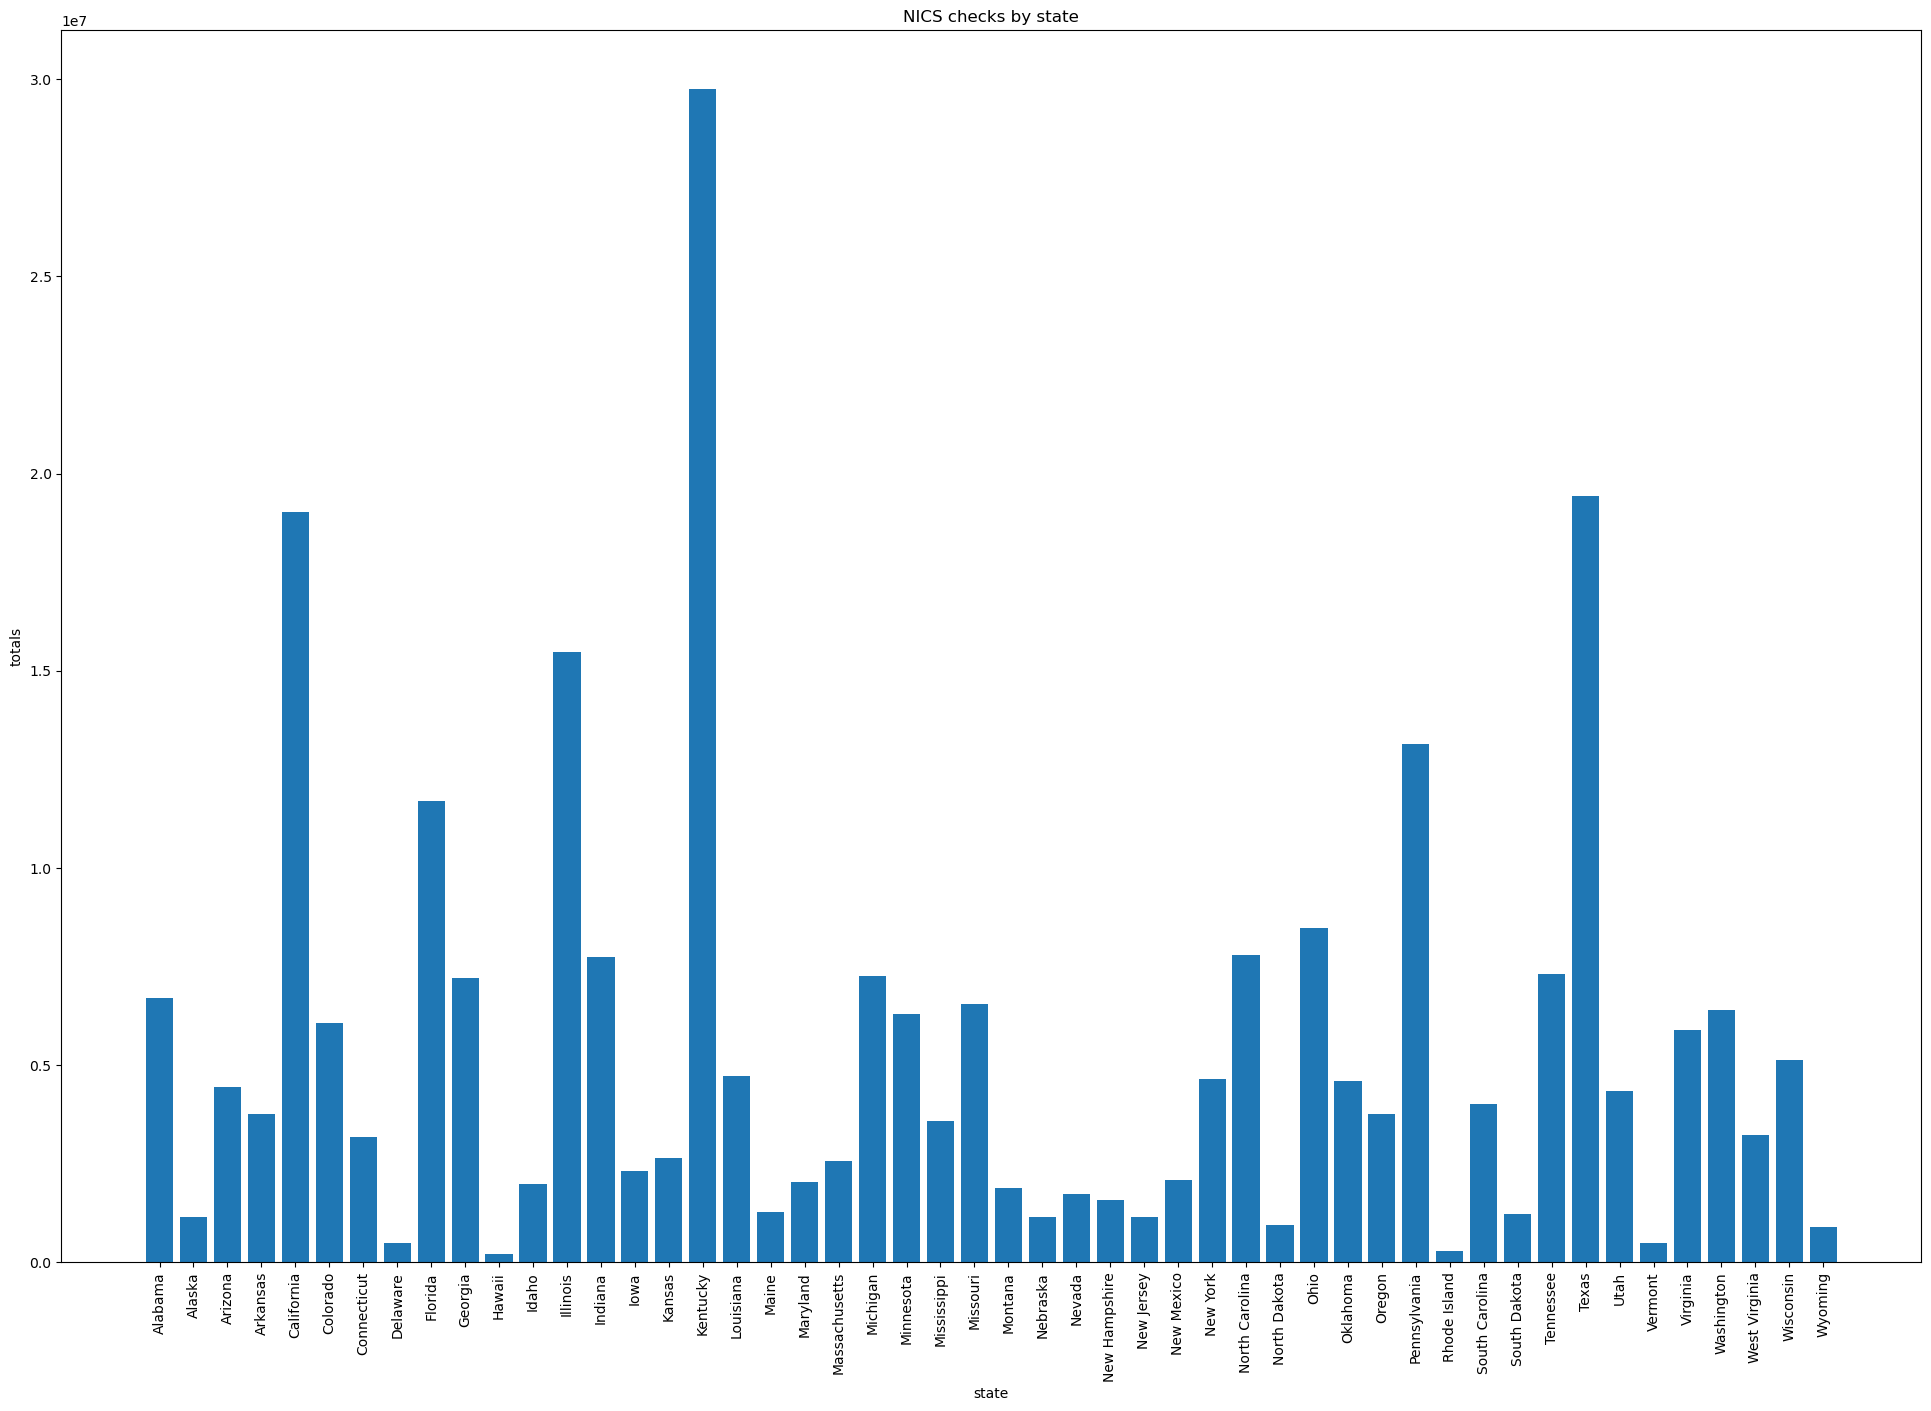

In [45]:
plt.figure(figsize=[24,16])
plt.bar(nics_states.index, nics_states.totals)
plt.xlabel('state')
plt.ylabel('totals')
plt.title('NICS checks by state')
plt.xticks(rotation='vertical')
plt.show()

At first look, we notice that for obvious reasons, the background checks are correlated, with population size, so let us look at the per capita data.

In [46]:
nics_per_capita = nics_states.join(census['population'])
nics_5y_per_capita = nics_5y_states.join(census['population'])

In [47]:
for c in nics_per_capita.columns:
    nics_per_capita.loc[:, c] = nics_per_capita.loc[:, c] / nics_per_capita['population']
    nics_5y_per_capita.loc[:, c] = nics_5y_per_capita.loc[:, c] / nics_5y_per_capita['population']

In [48]:
nics_sorted = nics_per_capita.sort_values('totals')
nics_5y_sorted = nics_5y_per_capita.sort_values('totals')

In [49]:
nics_5y_sorted

,permit,handgun,long_gun,other,multiple,totals,population
state,,,,,,,
Hawaii,0.058027,0.000000,0.000000,0.000000,0.000000,0.058100,1.0
New Jersey,0.000000,0.033330,0.025340,0.001287,0.000000,0.059957,1.0
New York,0.011731,0.029167,0.050123,0.002327,0.000515,0.096103,1.0
Rhode Island,0.000000,0.058588,0.045509,0.003136,0.008919,0.117129,1.0
Maryland,0.018633,0.058158,0.061998,0.001277,0.000209,0.142885,1.0
Massachusetts,0.074675,0.050360,0.028517,0.003782,0.001600,0.159418,1.0
Nebraska,0.139183,0.004259,0.077593,0.000611,0.000165,0.225742,1.0
California,0.093827,0.065447,0.058177,0.009176,0.000000,0.228227,1.0
Nevada,0.047976,0.108296,0.073261,0.005514,0.006645,0.252128,1.0


Now we have per capita data, with the sanity check of the population ratio of 1.

In [50]:
# New function to replace repetitive cells (replaced cells in comments):

def barhplot(dataset, years):
    plt.figure(figsize=[24,16])
    plt.barh(dataset.index, dataset.totals)
    plt.xlabel("NICS checks per capita")
    plt.ylabel("States")
    plt.title("NICS checks by state per capita in the last {} years".format(years))
    plt.show()

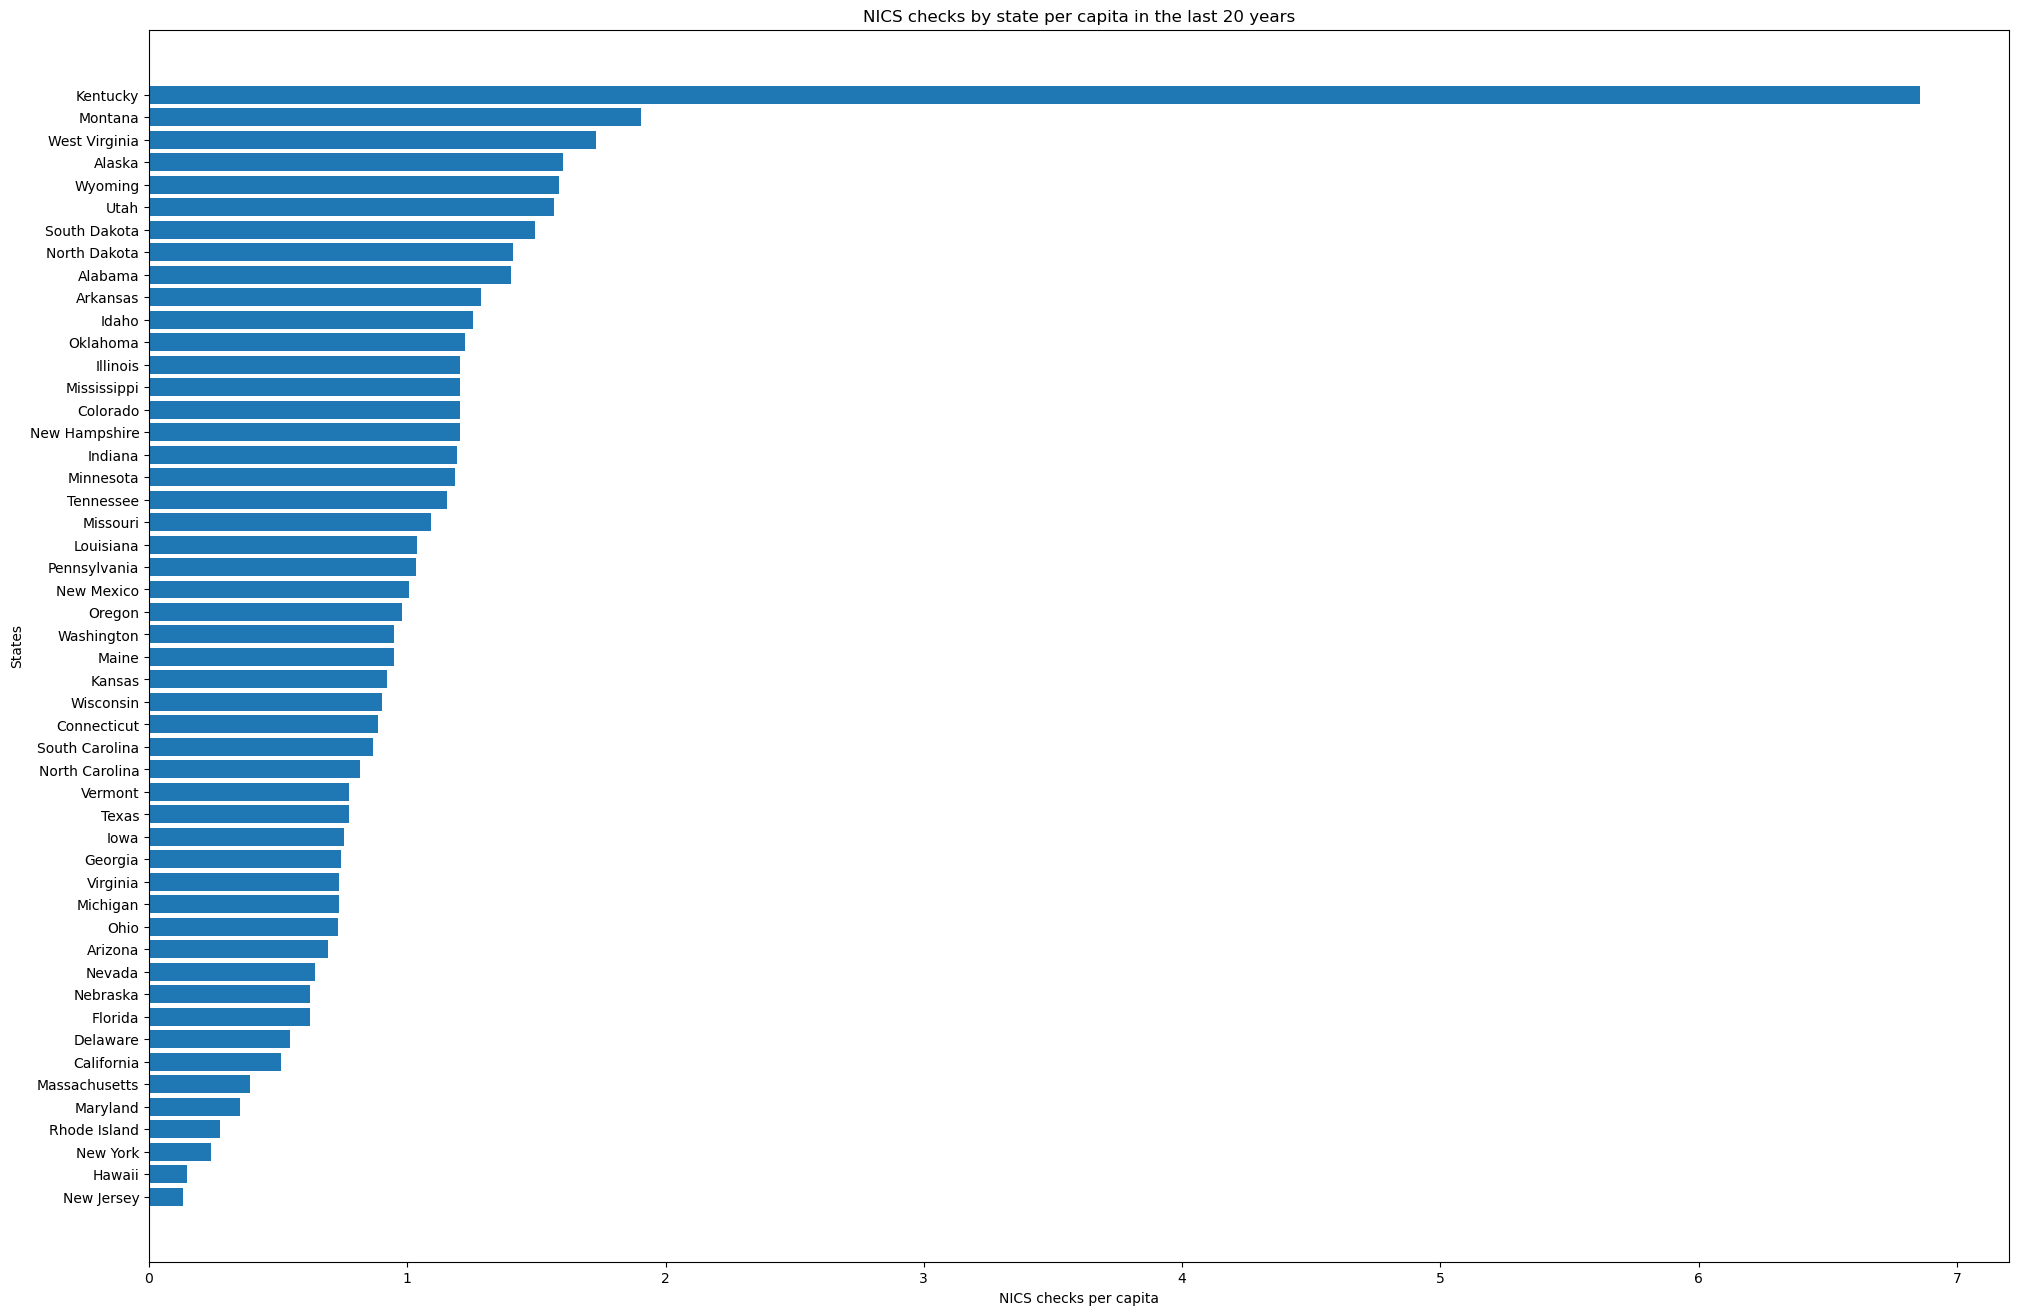

In [51]:
barhplot(nics_sorted, 20)

In [52]:
# plt.figure(figsize=[24,16])
# plt.barh(nics_sorted.index, nics_sorted.totals)
# plt.xlabel('NICS checks per capita')
# plt.ylabel('States')
# plt.title('NICS checks by state per capita in the last 20 years')

# plt.show()

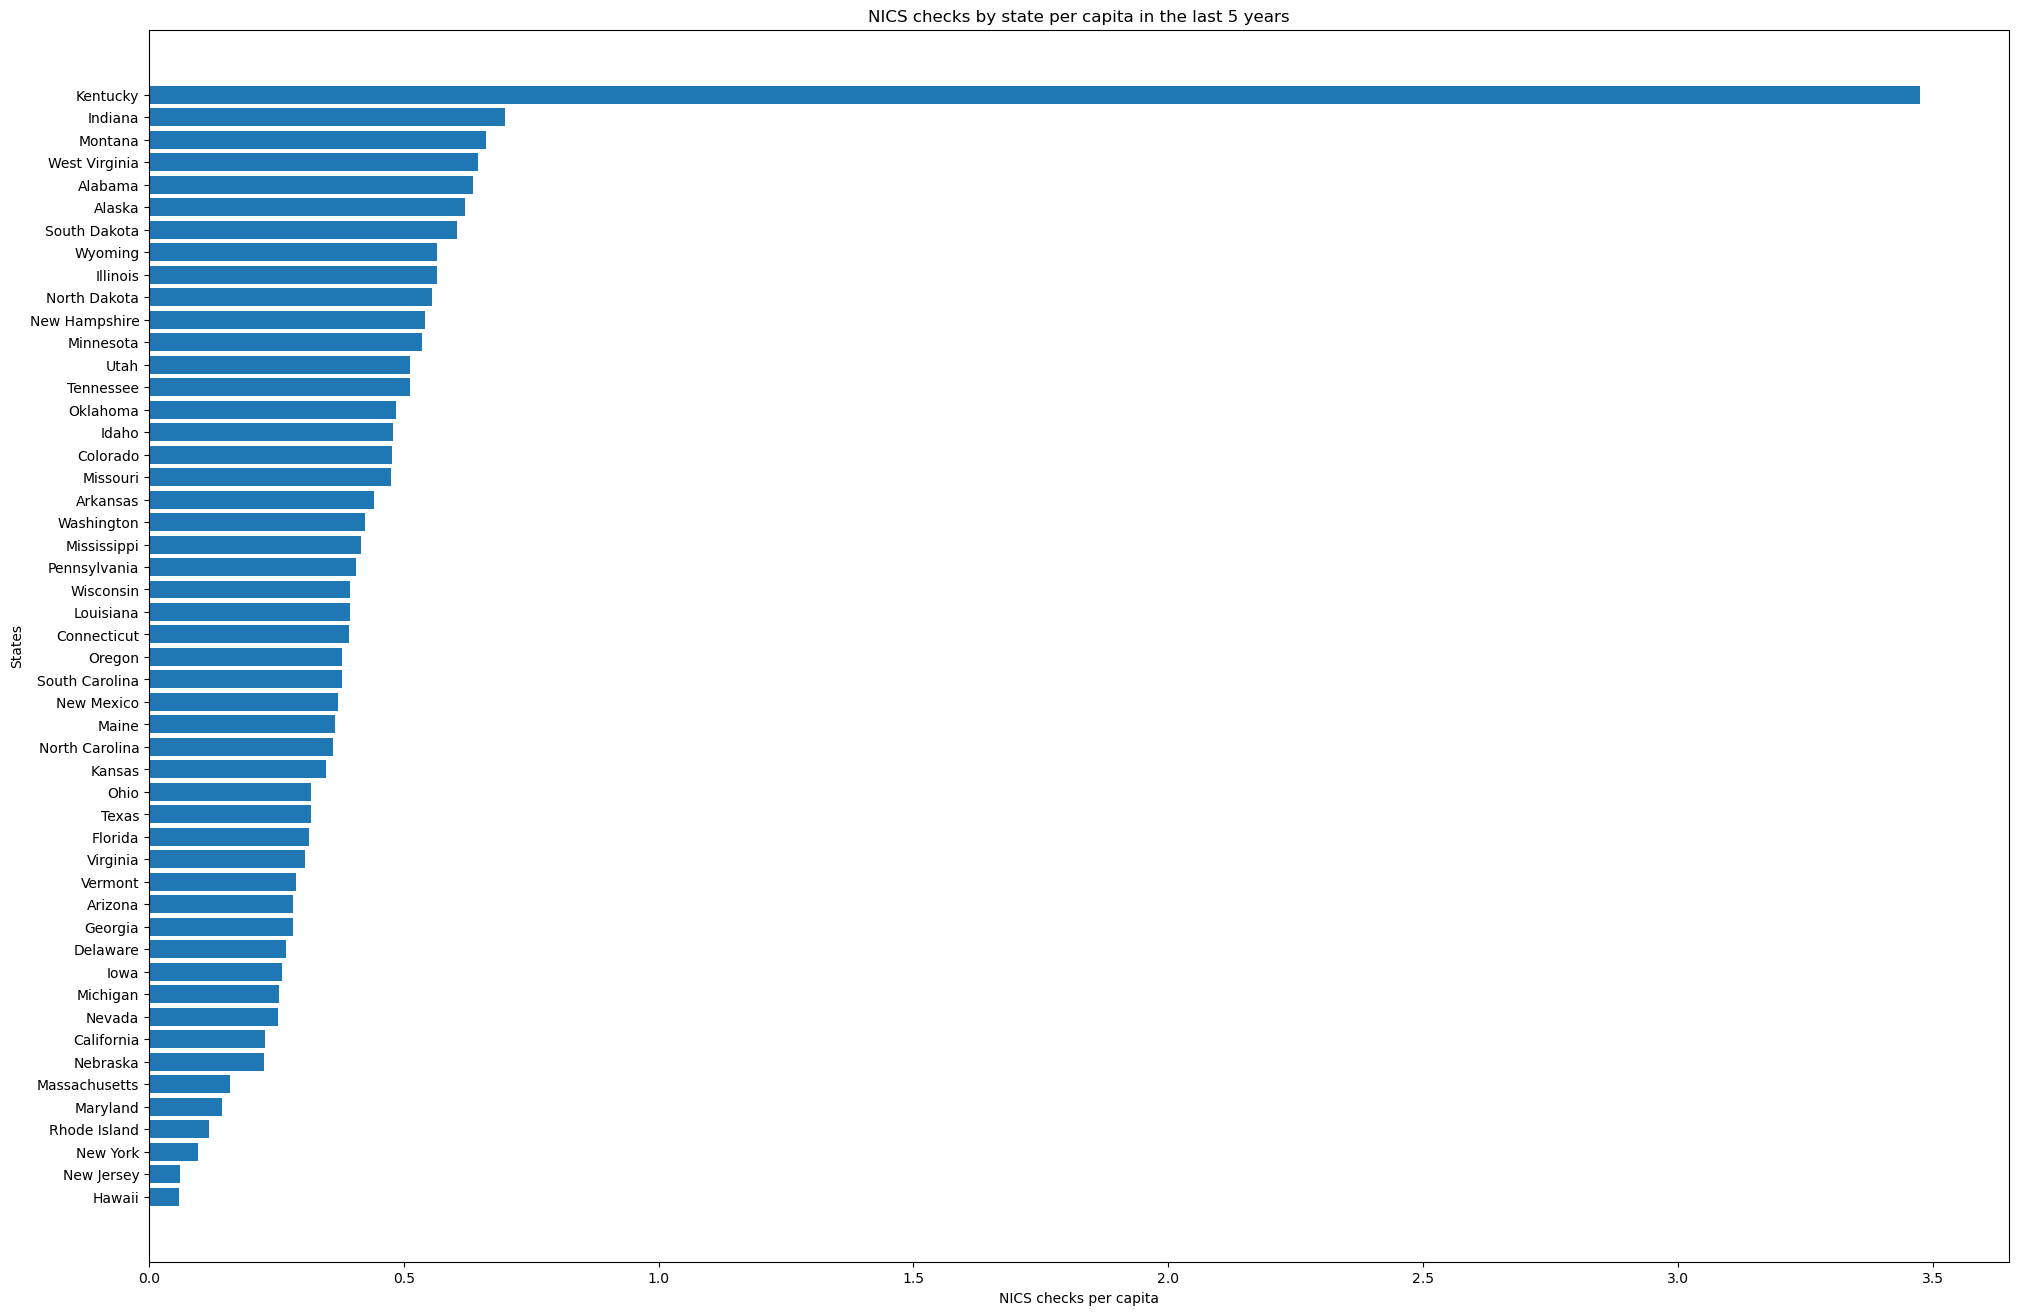

In [53]:
barhplot(nics_5y_sorted, 5)

In [54]:
# plt.figure(figsize=[24,16])
# plt.barh(nics_5y_sorted.index, nics_5y_sorted.totals)
# plt.xlabel('NICS checks per capita')
# plt.ylabel('States')
# plt.title('NICS checks by state per capita in the last 5 years')

# plt.show()

The data are similar for the 2 time intervals. Kentucky is a clear outlier. This is explained in the notes coming with the dataset: "Kentucky runs a new check on each concealed carry license holder each month".

So let's rerun the analysis with only the handgun and long gun variables.

In [55]:
nics_per_capita['total_gun'] = nics_per_capita['handgun'] + nics_per_capita['long_gun']
nics_5y_per_capita['total_gun'] = nics_5y_per_capita['handgun'] + nics_5y_per_capita['long_gun']

In [56]:
nics_sorted = nics_per_capita.sort_values('total_gun')
nics_5y_sorted = nics_5y_per_capita.sort_values('total_gun')

In [57]:
# New function to replace repetitive cells (replaced cells in comments):

def barhplot_guns(dataset, years):
    plt.figure(figsize=[24,16])
    plt.barh(dataset.index, dataset.total_gun)
    plt.xlabel("NICS checks per capita")
    plt.ylabel("States")
    plt.title("NICS checks by state per capita, restricted to handguns and long guns, in the last {} years".format(years))
    plt.show()

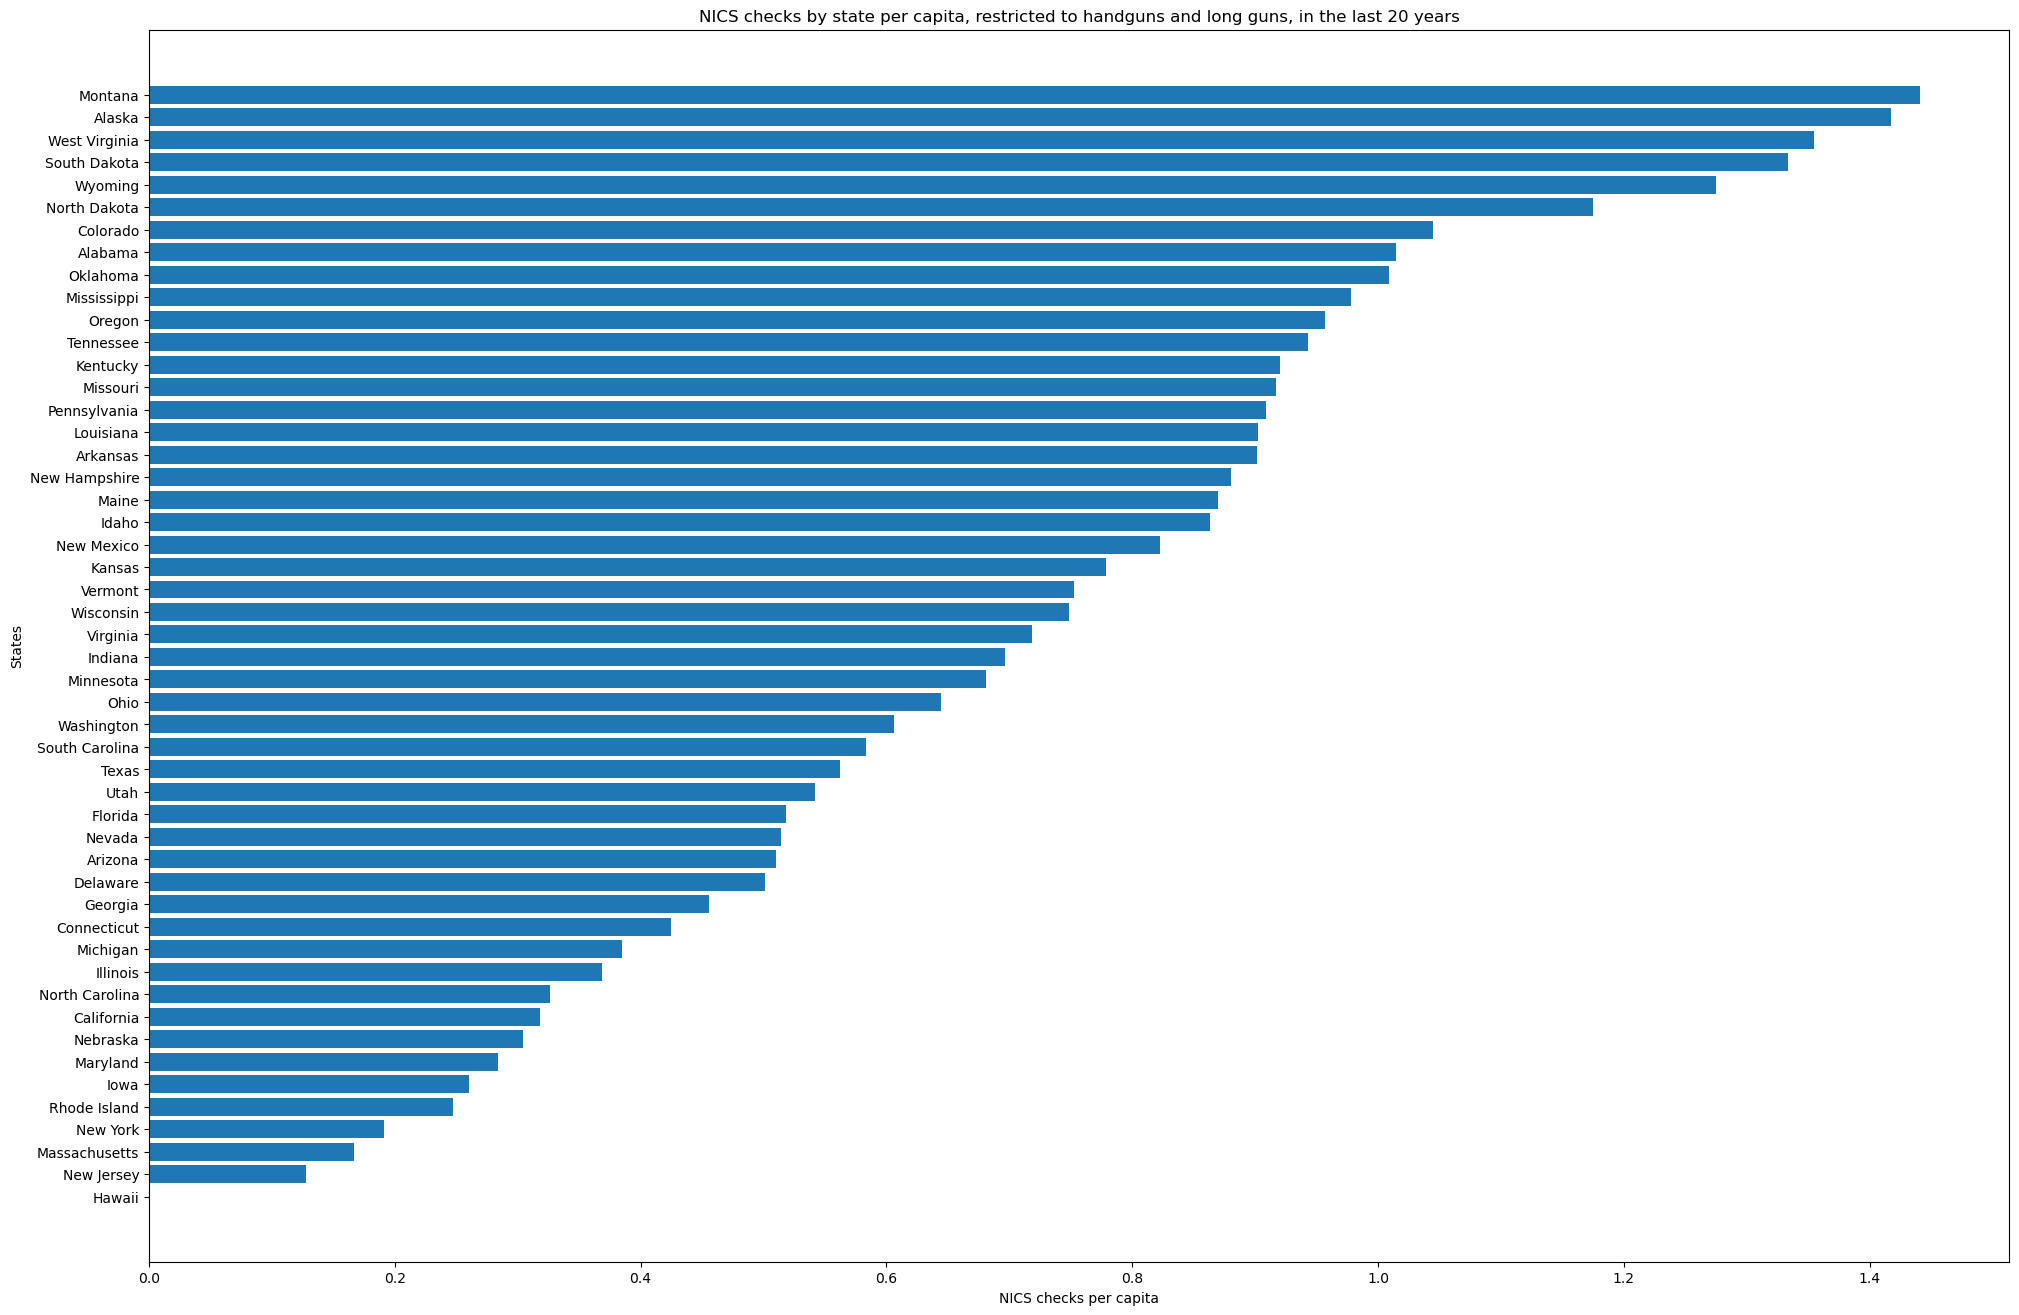

In [58]:
barhplot_guns(nics_sorted, 20)

In [59]:
# plt.figure(figsize=[24,16])
# plt.barh(nics_sorted.index, nics_sorted.total_gun)
# plt.xlabel('NICS checks per capita')
# plt.ylabel('States')
# plt.title('NICS checks by state per capita, restricted to handguns and long guns in the last 20 years')

# plt.show()

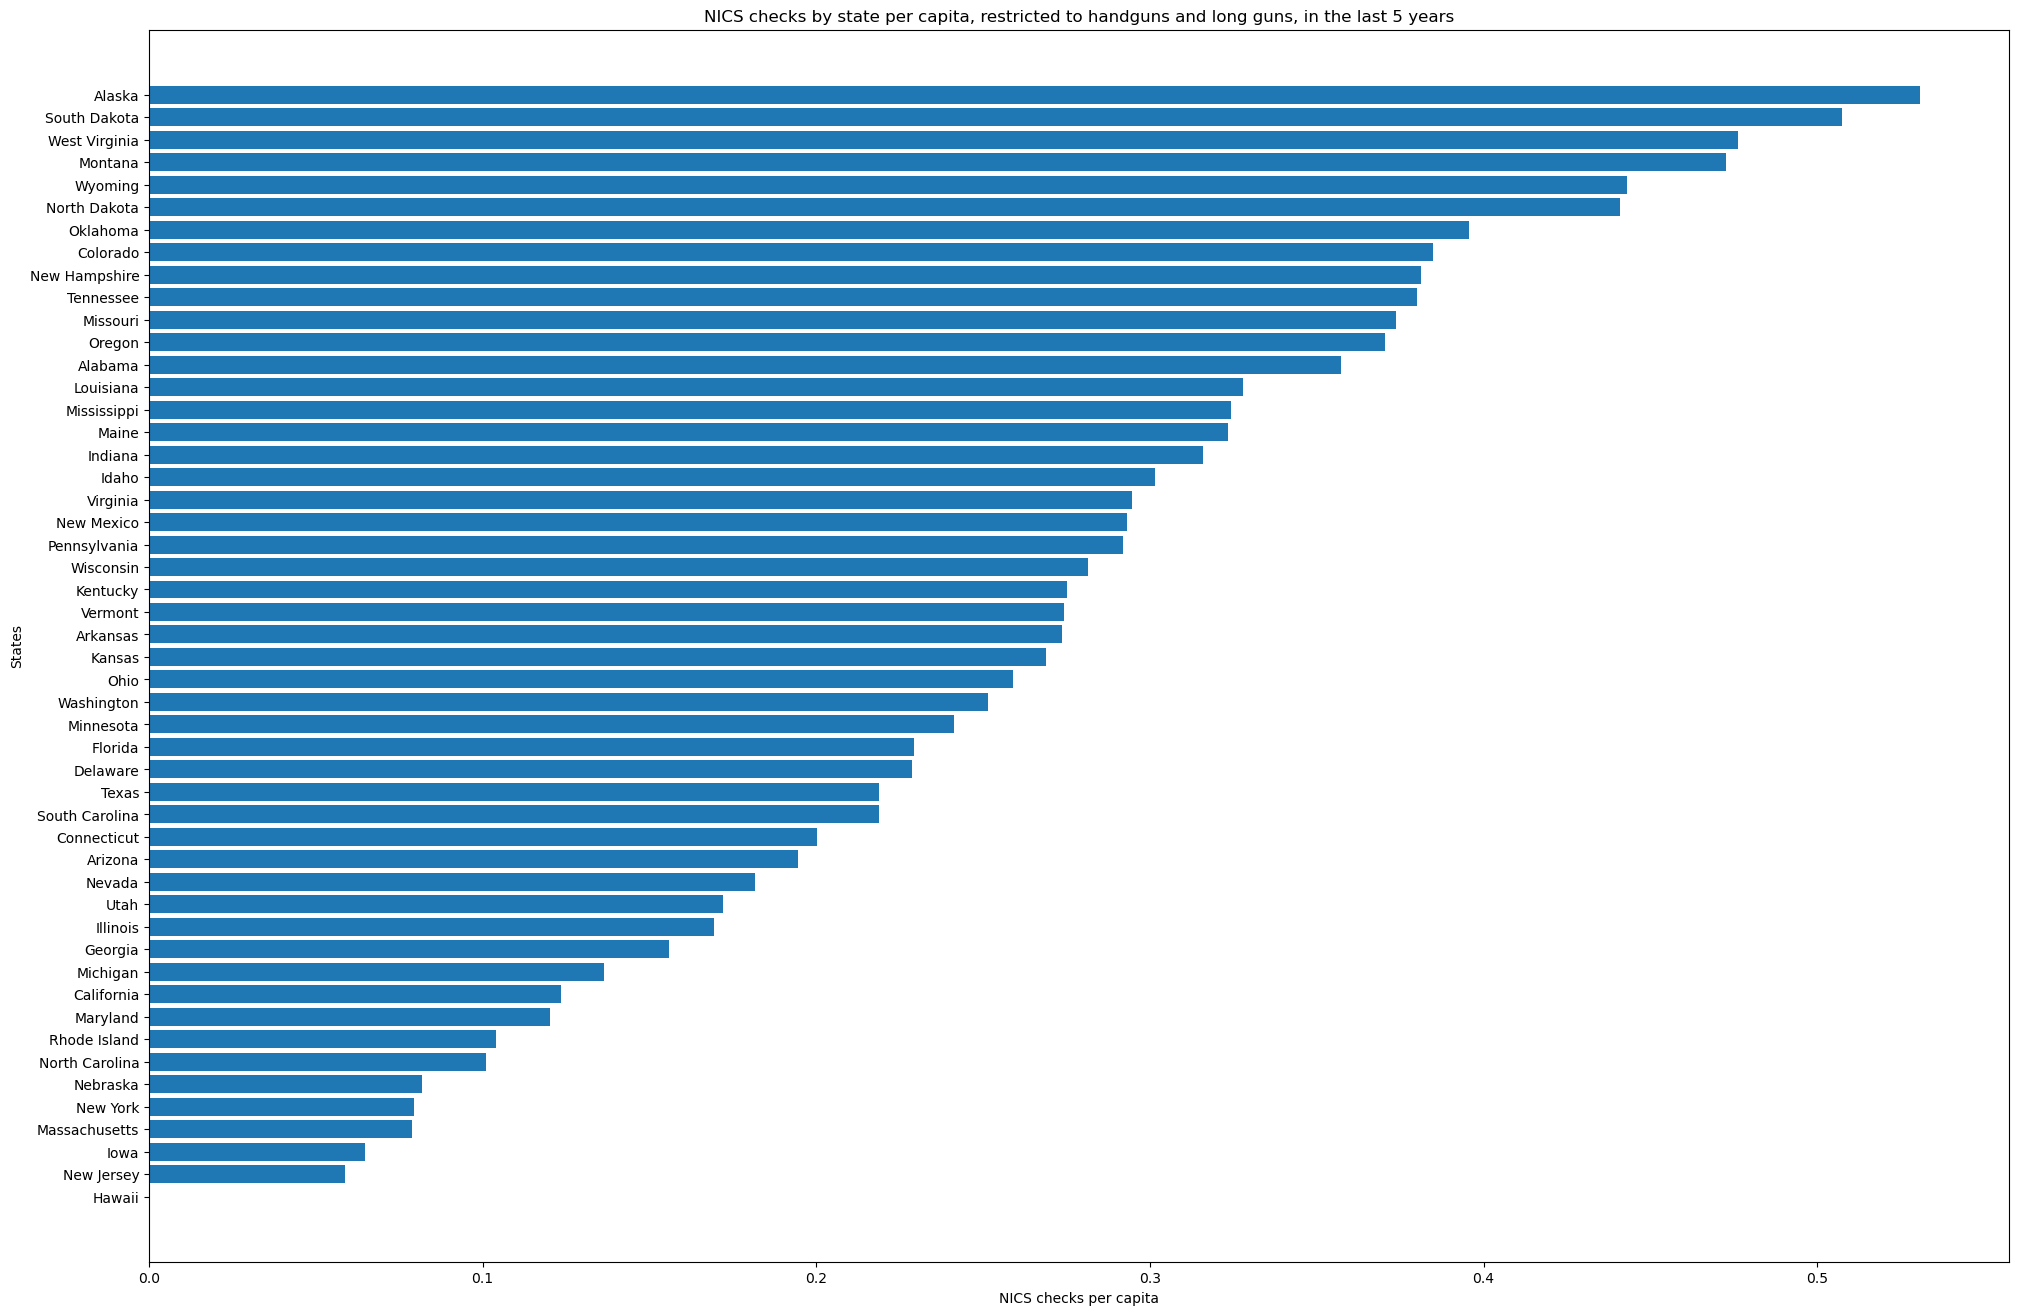

In [60]:
barhplot_guns(nics_5y_sorted, 5)

In [61]:
# plt.figure(figsize=[24,16])
# plt.barh(nics_5y_sorted.index, nics_5y_sorted.total_gun)
# plt.xlabel('NICS checks per capita')
# plt.ylabel('States')
# plt.title('NICS checks by state per capita, restricted to handguns and long guns, in the last 5 years')

# plt.show()

The time frame doesn't seem to matter much. States seem consistent in their gun purchases trends.

Hawai is an outlier with very few gun purchases per capita. 
Urban states seem on the lower end of gun purchases: New Jersey, Massachusetts, New York, Rhode Island, Maryland... But some rural states are also present: Nebraska, Iowa.

On the high end, we see mainly rural states: Alaska, the Dakotas, West Virginia, Wyoming, Montana...

Let us now see with the next question if we can pin down the relevant demographic variables.

### Correlations of gun purchases with census variables

In [62]:
df = census

I will transform the following variables: 

- a new variable population_density = population / land_area
- verterans_percent = veterans / population * 100
- employment_percent = employment / population * 100

So that the variables are not dependent on the population size.

In [63]:
df['population_density'] = df['population'] / df['land_area']
df['veterans_percent'] = df['veterans'] / df['population'] * 100
df['employment_percent'] = df['employment'] / df['population'] * 100

In [64]:
# df.head(5)
df.describe()

State,population,land_area,under_18y_percent,over_65y_percent,female_percent,black_percent,native_american_percent,asian_percent,native_pacific_percent,hispanic_percent,white_percent,veterans,foreign_born_percent,hs_percent,bachelor_percent,employment,per_capita_income,population_density,veterans_percent,employment_percent
count,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000,50.000000,5.000000e+01,50.00000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,6.163127e+06,70636.887800,17.425780,11.81044,38.511740,8.360900,1.18026,3.63118,0.360360,8.874680,52.779080,4.015940e+05,7.07704,67.424100,22.363160,2.471459e+06,28491.780000,194.981476,7.173003,40.095804
std,6.848463e+06,85815.678218,9.936137,6.84738,21.584467,9.917937,2.36307,5.79106,1.444674,9.805721,32.872755,3.831585e+05,6.75162,37.882927,13.383697,2.733595e+06,4103.284534,261.118884,1.213013,4.548393
min,5.637670e+05,1033.810000,0.197000,0.14500,0.487000,0.020000,0.00300,0.01500,0.000000,0.036000,0.381000,4.470800e+04,0.03000,0.842000,0.241000,2.198810e+05,21057.000000,1.244651,4.275887,30.413977
25%,1.833003e+06,36741.167500,19.025000,10.42500,48.000000,0.650000,0.22500,0.80000,0.002000,1.525000,26.000000,1.332715e+05,1.65000,81.825000,19.575000,5.888890e+05,25443.750000,44.433008,6.485900,37.776170
50%,4.436412e+06,53891.280000,22.250000,15.00000,50.300000,4.700000,0.60000,2.35000,0.100000,6.250000,62.050000,3.020175e+05,4.80000,87.850000,27.200000,1.606934e+06,27669.500000,98.724207,7.293251,40.206493
75%,6.680362e+06,81225.725000,23.450000,16.10000,50.900000,12.400000,1.17500,4.55000,0.100000,11.575000,79.600000,4.949490e+05,11.22500,90.625000,31.075000,3.040622e+06,30977.000000,209.500803,7.997617,42.237600
max,3.725452e+07,570640.950000,30.200000,19.90000,51.600000,37.700000,15.20000,37.70000,10.200000,39.100000,93.500000,1.777410e+06,27.00000,92.800000,40.500000,1.432538e+07,38803.000000,1195.497687,9.760380,54.400520


In [65]:
df = df.join(nics_sorted.total_gun)

In [66]:
df.corr()['total_gun']

population                -0.379411
land_area                  0.358228
under_18y_percent         -0.088005
over_65y_percent          -0.086718
female_percent            -0.104708
black_percent             -0.146017
native_american_percent    0.343734
asian_percent             -0.456416
native_pacific_percent    -0.269873
hispanic_percent          -0.347722
white_percent              0.100698
veterans                  -0.333765
foreign_born_percent      -0.528301
hs_percent                -0.090830
bachelor_percent          -0.218145
employment                -0.391453
per_capita_income         -0.343633
population_density        -0.579734
veterans_percent           0.573048
employment_percent        -0.210771
total_gun                  1.000000
Name: total_gun, dtype: float64

In [67]:
df.corr()['total_gun'][df.corr()['total_gun']>.3]

land_area                  0.358228
native_american_percent    0.343734
veterans_percent           0.573048
total_gun                  1.000000
Name: total_gun, dtype: float64

In [68]:
df.corr()['total_gun'][df.corr()['total_gun']<-.3]

population             -0.379411
asian_percent          -0.456416
hispanic_percent       -0.347722
veterans               -0.333765
foreign_born_percent   -0.528301
employment             -0.391453
per_capita_income      -0.343633
population_density     -0.579734
Name: total_gun, dtype: float64

We see that gun per capita is correlated with 3 variables: land_area, native_american_percent, veterans_percent.

The native_american_percent correlation may be misleading because their share is low in most states. So I am unsure if the correlation is relevant.

<AxesSubplot:xlabel='native_american_percent', ylabel='total_gun'>

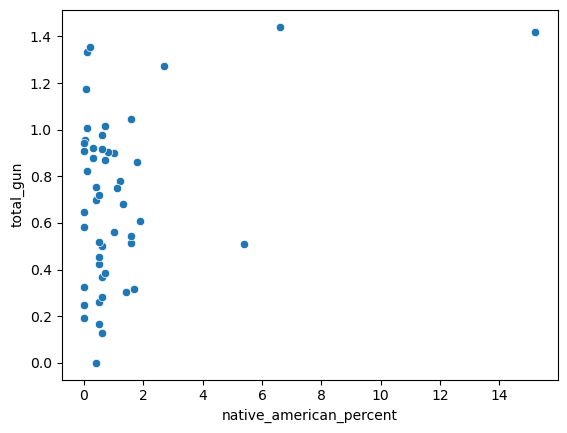

In [69]:
sns.scatterplot(x=df.native_american_percent, y=df.total_gun)

veterans_percent has the stronger positive correlation of 0.57. It is sensible that people familiar with guns and with self defense have the inclination to own guns. The negative correlation with total veterans number may be caused by the bias caused by population size.

<AxesSubplot:xlabel='veterans_percent', ylabel='total_gun'>

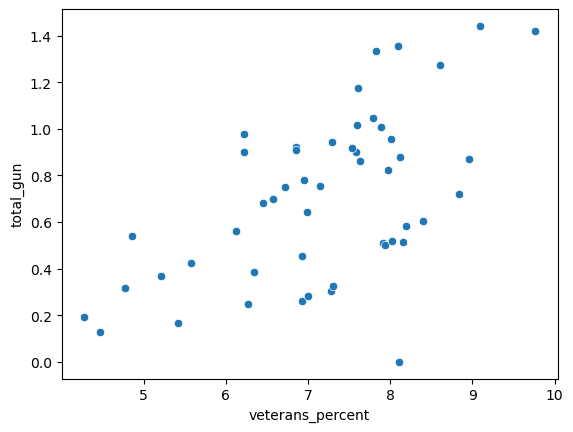

In [70]:
sns.scatterplot(x=df.veterans_percent, y=df.total_gun)

Land area makes sense but I think this is even more obvious when we will at the negative correlation with population size and especially strong negative correlation of -0.58 of gun ownership with population density.
It may have to do with the rural aspect, where we can imagine that in large and wild lands, people may be more inclined to protect themselves, in contrast with urban settings where police forces have more oversight, and people can rely more on their neighbors.

<AxesSubplot:xlabel='population_density', ylabel='total_gun'>

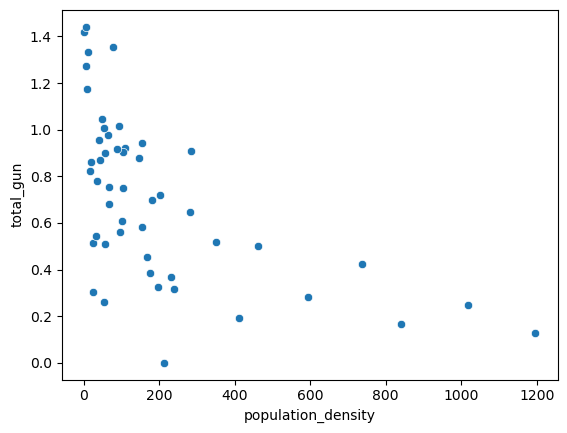

In [71]:
sns.scatterplot(x=df.population_density, y=df.total_gun)

Two demographics variable: Hispanic and Asian proportions of population are negatively correlated with gun ownership.
It may indicates either a lesser affinity of these populations with gun ownership. 

Or, given that Asian and Hispanic immigration are the more recent immmigration in the U.S.A., and that foreign_born_percent is strongly negatively correlated (-0.53) with gun ownership, it may be that foreigners are less inclined towards gun ownership that demographics from early immigration to the U.S.A.

Another possible confounder is the rural/urban divide, given that immigrants usually cluster around cities, and less in sparsely populated areas.

<AxesSubplot:xlabel='foreign_born_percent', ylabel='total_gun'>

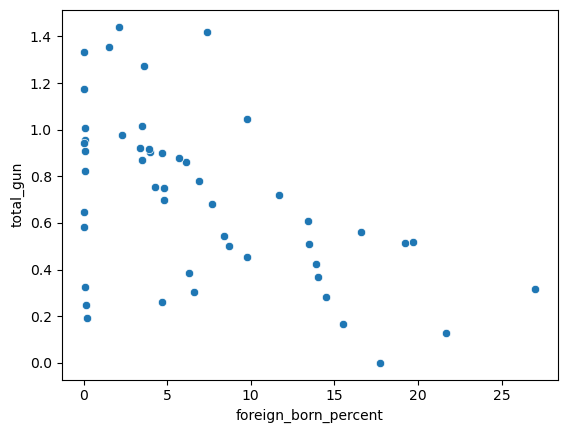

In [72]:
sns.scatterplot(x=df.foreign_born_percent, y=df.total_gun)

Finally, per_capita income is negatively correlated with gun purchases, along with employment, even if for the latter the magnitude of the correlation diminish if we consider employment rate. There may be a pattern of people earning more living in more secure settings, having higher trust in their communities. Or it may be confounded by the higher population density or foreign born share associated with urban settings (where people earn more on average).

<a id='conclusions'></a>
## Conclusions

In this project, we analysed the NICS background checks dataset against data from the U.S. census.

### Limitations

The big caveat of this analysis is that background checks are only a proxy of gun purchases in America. There are a lot of differences in regulations across the 50 states, and private transactions go under the radar, along with illegal puchases.

We also selected a subset of the census data, in order to facilitate the analysis, there may be left over relevant variables in the census dataset.

As usual with every analysis based on correlation, we can't assume a causal link between one correlated variable and the other. But they can be a starting point for further investigation.

### Results

The sales seem to be increasing, with a noticeable steady rise since around 2008.
Interestingly, sales seem to follow a periodic patterns, with disturbances possibly caused by changes in law or some events.

Gun purchasing, and we may assume, gun ownership vary wildy across the 50 States. The most salient correlations are: 
- a positive one with the share of veterans in a population.
- a negative one with the share of foreign born people.
- a negative one with population density.
Along with weaker correlations that are trickier to interpret due to the bias caused by, I think, these more relevant variables.

The data is up to 2016-2017, it would be interesting what the trends are for the last 5 years, especially given the many events that happened in the U.S. and worldwide.